In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from scipy import stats
import scvelo as scv
from sckinetics import kinetics_inference

In [2]:
df = pd.read_csv('./metabolic_labeling/aax3072_table-s4.csv',index_col=0,header=1)

In [3]:
adata = sc.read('./organoid_selected_genes.h5ad')

In [4]:
alpha = pd.read_csv('./celldancer/organoid_alpha.csv', index_col=0)
gamma = pd.read_csv('./celldancer/organoid_gamma.csv', index_col=0)
alpha = alpha.loc[:,adata.var.index]
gamma = gamma.loc[:,adata.var.index]

In [5]:
adata.layers['cd_alpha'] = alpha.values
adata.layers['cd_gamma'] = gamma.values

In [6]:
cell_mapper = {
    '1': 'Enterocytes branch',
    '2': 'Enterocytes branch',
    '3': 'Secretory branch',
    '4': 'Secretory branch',
    '5': 'Secretory branch',
    '6': 'Enterocytes branch',
    '7': 'Secretory branch',
    '8': 'Stem cells',
    '9': 'Secretory branch',
    '10': 'Secretory branch',
    '11': 'Stem cells',
}
adata.obs['cell_type'] = adata.obs.som_cluster_id.map(cell_mapper).astype('str')

In [7]:
enterocytes_branch = []
for cluster in adata.obs['som_cluster_id'].values:
    if cluster == '1' or cluster == '2' or cluster == '6':
        enterocytes_branch.append(True)
    else:
        enterocytes_branch.append(False)
        
adata.obs['enterocytes_branch'] = enterocytes_branch

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

saving figure to file ./figures/scvelo_organoid_latent_time.pdf


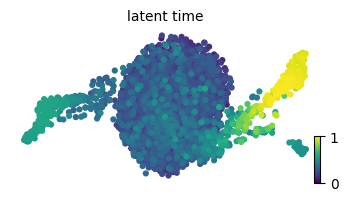

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
scv.pl.scatter(adata, color='unitvelo_time', color_map='viridis', size=80, ax=ax, title='latent time',save='organoid_latent_time.pdf')
plt.show()

saving figure to file ./figures/scvelo_organoid_celltype.pdf


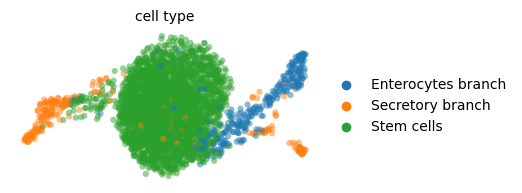

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
scv.pl.scatter(adata, color='cell_type', color_map='viridis',
               legend_loc='right',alpha=0.5,
               size=80, ax=ax, title='cell type',save='organoid_celltype.pdf')
plt.show()

In [11]:
adata = adata[adata.obs["enterocytes_branch"]==True, :].copy()

In [12]:
groupA_gene = adata.var.index.intersection(df[df['strategy_group'] == 'A']['gene_symbol'])
groupA = adata[:,groupA_gene].copy()
groupA.obs['mean_transcription_rate'] = (groupA.layers['alpha'].mean(axis=1))
groupA.obs['mean_degradation_rate'] = groupA.layers['gamma'].mean(axis=1)
groupA.obs['cd_mean_transcription_rate'] = (groupA.layers['cd_alpha'].mean(axis=1))
groupA.obs['cd_mean_degradation_rate'] = groupA.layers['cd_gamma'].mean(axis=1)
t_max = np.percentile(groupA.obs['mean_transcription_rate'],99)
d_max = np.percentile(groupA.obs['mean_degradation_rate'],99)
print(t_max, d_max)

198.7820587870283 118.0170942465536


In [13]:
groupC_gene = adata.var.index.intersection(df[df['strategy_group'] == 'C']['gene_symbol'])
groupC = adata[:,groupC_gene].copy()
groupC.obs['mean_transcription_rate'] = (groupC.layers['alpha'].mean(axis=1))
groupC.obs['mean_degradation_rate'] = (groupC.layers['gamma'].mean(axis=1))
groupC.obs['cd_mean_transcription_rate'] = (groupC.layers['cd_alpha'].mean(axis=1))
groupC.obs['cd_mean_degradation_rate'] = groupC.layers['cd_gamma'].mean(axis=1)
t_max = np.percentile(groupC.obs['mean_transcription_rate'],99)
d_max = np.percentile(groupC.obs['mean_degradation_rate'],99)
print(t_max,d_max)


363.3332280472663 179.90584520195713


In [14]:
groupB_gene = adata.var.index.intersection(df[df['strategy_group'] == 'B']['gene_symbol'])
groupB = adata[:,groupB_gene].copy()
groupB.obs['mean_transcription_rate'] = (groupB.layers['alpha'].mean(axis=1))
groupB.obs['mean_degradation_rate'] = (groupB.layers['gamma'].mean(axis=1))
groupB.obs['cd_mean_transcription_rate'] = (groupB.layers['cd_alpha'].mean(axis=1))
groupB.obs['cd_mean_degradation_rate'] = groupB.layers['cd_gamma'].mean(axis=1)
t_max = np.percentile(groupB.obs['mean_transcription_rate'],99)
d_max = np.percentile(groupB.obs['mean_degradation_rate'],99)
print(t_max, d_max)

146.96011251832886 120.00109114217983


In [15]:
groupD_gene = adata.var.index.intersection(df[df['strategy_group'] == 'D']['gene_symbol'])
groupD = adata[:,groupD_gene].copy()
groupD.obs['mean_transcription_rate'] = (groupD.layers['alpha'].mean(axis=1))
groupD.obs['mean_degradation_rate'] =(groupD.layers['gamma'].mean(axis=1))
groupD.obs['cd_mean_transcription_rate'] = (groupD.layers['cd_alpha'].mean(axis=1))
groupD.obs['cd_mean_degradation_rate'] = groupD.layers['cd_gamma'].mean(axis=1)

saving figure to file ./figures/scvelo_organoid_groupA_transcription.pdf


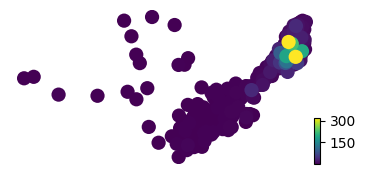

saving figure to file ./figures/scvelo_organoid_groupA_degradation.pdf


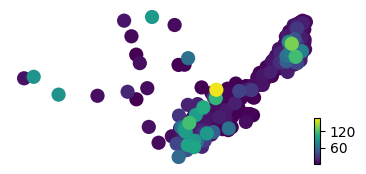

saving figure to file ./figures/scvelo_organoid_groupC_transcription.pdf


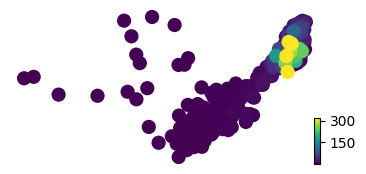

saving figure to file ./figures/scvelo_organoid_groupC_degradation.pdf


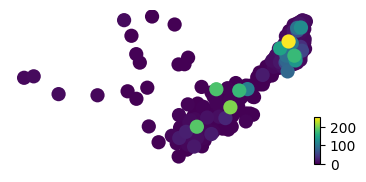

saving figure to file ./figures/scvelo_organoid_groupB_transcription.pdf


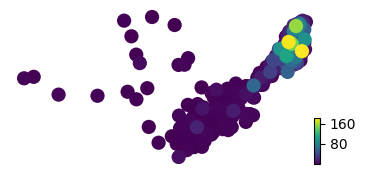

saving figure to file ./figures/scvelo_organoid_groupB_degradation.pdf


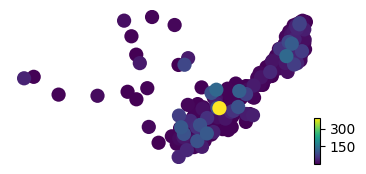

saving figure to file ./figures/scvelo_organoid_groupD_transcription.pdf


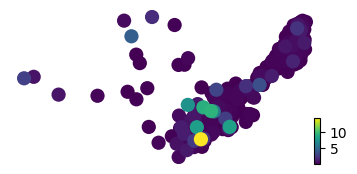

saving figure to file ./figures/scvelo_organoid_groupD_degradation.pdf


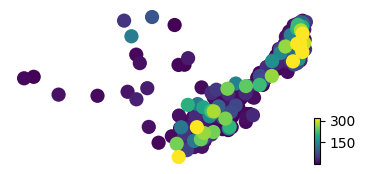

In [16]:
scv.pl.umap(groupA,color='mean_transcription_rate',vmax=320,frameon=False,title='',figsize=(4,2),save='organoid_groupA_transcription.pdf')
scv.pl.umap(groupA,color='mean_degradation_rate', vmax=170,frameon=False,title='',figsize=(4,2),save='organoid_groupA_degradation.pdf')
scv.pl.umap(groupC,color='mean_transcription_rate',vmax=320,frameon=False,title='',figsize=(4,2),save='organoid_groupC_transcription.pdf')
scv.pl.umap(groupC,color='mean_degradation_rate',vmax=250,frameon=False,title='',figsize=(4,2),save='organoid_groupC_degradation.pdf')
scv.pl.umap(groupB,color='mean_transcription_rate',frameon=False,title='',figsize=(4,2),save='organoid_groupB_transcription.pdf')
scv.pl.umap(groupB,color='mean_degradation_rate',frameon=False,title='',figsize=(4,2),save='organoid_groupB_degradation.pdf')
scv.pl.umap(groupD,color='mean_transcription_rate',frameon=False,title='',figsize=(4,2),save='organoid_groupD_transcription.pdf')
scv.pl.umap(groupD,color='mean_degradation_rate',vmax=320,frameon=False,title='',figsize=(4,2),save='organoid_groupD_degradation.pdf')

saving figure to file ./figures/scvelo_cd_organoid_groupA_transcription.pdf


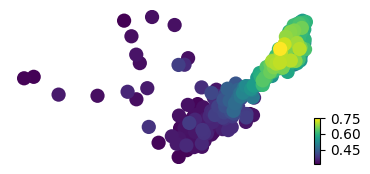

saving figure to file ./figures/scvelo_cd_organoid_groupA_degradation.pdf


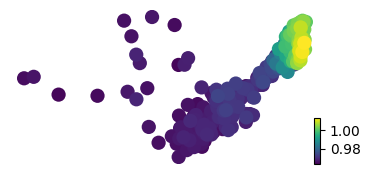

saving figure to file ./figures/scvelo_cd_organoid_groupC_transcription.pdf


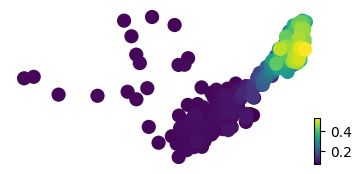

saving figure to file ./figures/scvelo_cd_organoid_groupC_degradation.pdf


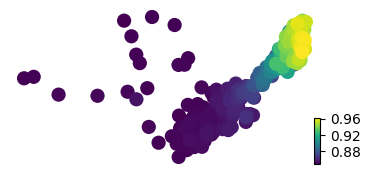

saving figure to file ./figures/scvelo_cd_organoid_groupB_transcription.pdf


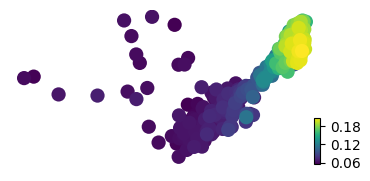

saving figure to file ./figures/scvelo_cd_organoid_groupB_degradation.pdf


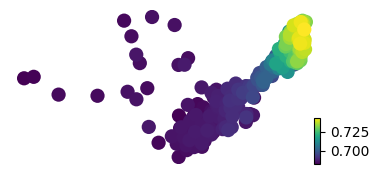

saving figure to file ./figures/scvelo_cd_organoid_groupD_transcription.pdf


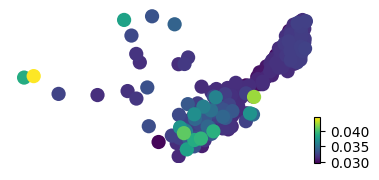

saving figure to file ./figures/scvelo_cd_organoid_groupD_degradation.pdf


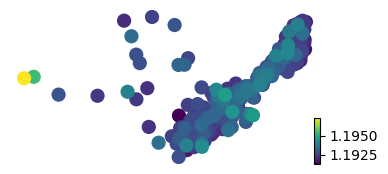

In [17]:
scv.pl.umap(groupA,color='cd_mean_transcription_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupA_transcription.pdf')
scv.pl.umap(groupA,color='cd_mean_degradation_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupA_degradation.pdf')
scv.pl.umap(groupC,color='cd_mean_transcription_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupC_transcription.pdf')
scv.pl.umap(groupC,color='cd_mean_degradation_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupC_degradation.pdf')
scv.pl.umap(groupB,color='cd_mean_transcription_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupB_transcription.pdf')
scv.pl.umap(groupB,color='cd_mean_degradation_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupB_degradation.pdf')
scv.pl.umap(groupD,color='cd_mean_transcription_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupD_transcription.pdf')
scv.pl.umap(groupD,color='cd_mean_degradation_rate',frameon=False,title='',figsize=(4,2),save='cd_organoid_groupD_degradation.pdf')

saving figure to file ./figures/scvelo_heatmap_groupD_heatmap_transcription.pdf


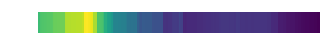

saving figure to file ./figures/scvelo_heatmap_groupD_heatmap_degradation.pdf


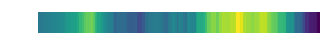

In [18]:
X = np.concatenate((groupD.obs['mean_transcription_rate'].values.reshape(-1,1),
                    groupD.obs['mean_degradation_rate'].values.reshape(-1,1)),axis=1)
ad = sc.AnnData(X=X)
ad.var.index = ['t', 'd']
ad.obs = adata.obs
scv.pl.heatmap(ad, var_names=['t'], sortby='unitvelo_time', n_convolve=100, figsize=(4,0.3),
               sort=False,context='poster', save='groupD_heatmap_transcription.pdf')

scv.pl.heatmap(ad, var_names=['d'], sortby='unitvelo_time', n_convolve=100, figsize=(4,0.3),
               sort=False,context='poster', save='groupD_heatmap_degradation.pdf')


saving figure to file ./figures/scvelo_heatmap_cd_heatmap_rate.pdf


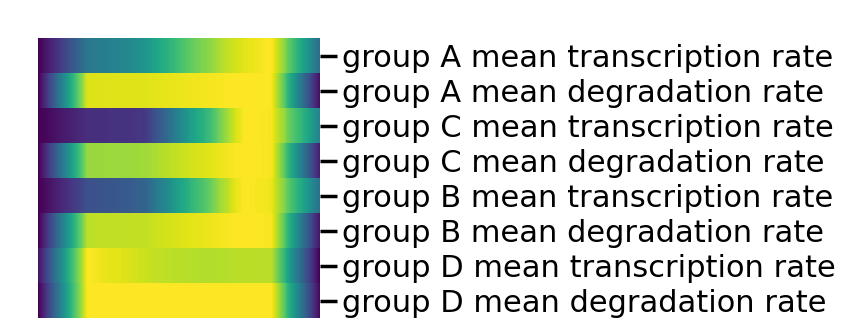

In [21]:
X = np.concatenate((groupA.obs['cd_mean_transcription_rate'].values.reshape(-1,1),
                    groupA.obs['cd_mean_degradation_rate'].values.reshape(-1,1),
                    groupC.obs['cd_mean_transcription_rate'].values.reshape(-1,1),
                    groupC.obs['cd_mean_degradation_rate'].values.reshape(-1,1),
                    groupB.obs['cd_mean_transcription_rate'].values.reshape(-1,1),
                    groupB.obs['cd_mean_degradation_rate'].values.reshape(-1,1),
                    groupD.obs['cd_mean_transcription_rate'].values.reshape(-1,1),
                    groupD.obs['cd_mean_degradation_rate'].values.reshape(-1,1),
                   ),axis=1)
ad = sc.AnnData(X=X)
ad.var.index = ['group A mean transcription rate', 'group A mean degradation rate',
                'group C mean transcription rate', 'group C mean degradation rate',
                'group B mean transcription rate', 'group B mean degradation rate',
                'group D mean transcription rate', 'group D mean degradation rate']
ad.obs = adata.obs
scv.pl.heatmap(ad, var_names=ad.var.index, sortby='unitvelo_time', n_convolve=100, figsize=(4,4),
               sort=False,context='poster', save='cd_heatmap_rate.pdf')